<a href="https://colab.research.google.com/github/Shashwat-arch/Spam-mail-classification-using-SVM/blob/main/Spam_mail_Classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear SVM Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve, KFold, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
email_rec = pd.read_csv("2. Spam.txt", sep=",", header=None)
print(email_rec.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


In [3]:
# renaming the columns
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(email_rec.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [4]:
email_rec.shape

(4601, 58)

In [5]:
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [6]:
email_rec.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [7]:
email_rec['spam'].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

In [8]:
email_rec.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [9]:
X = email_rec.drop("spam", axis=1)
y = email_rec.spam.values.astype(int)

In [10]:
X.shape

(4601, 57)

In [11]:
y.shape

(4601,)

In [12]:
from sklearn.preprocessing import scale
X = scale(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [14]:
print(y_train.mean())
print(y_test.mean())

0.3987577639751553
0.38305575669804487


In [15]:
model = SVC(C=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [16]:
from sklearn import metrics

metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[815,  37],
       [ 62, 467]])

In [17]:
print("accuracy", metrics.accuracy_score(y_test, y_pred))

print("precision", metrics.precision_score(y_test, y_pred))

print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9283128167994207
precision 0.9265873015873016
recall 0.8827977315689981


In [18]:
## The Model Accuracy so far is 92.8%

### HyperParameter Tuning

In [19]:
folds = KFold(n_splits=5, shuffle=True, random_state=5)

model = SVC(C=1)

In [20]:
cv_results = cross_val_score(model, X_train, y_train, cv=folds, scoring="accuracy")

In [21]:
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.93012422 0.92857143 0.92701863 0.93478261 0.92857143]
mean accuracy = 0.9298136645962733


### Grid Search CV for Optimal value of C

In [22]:
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

model_cv = GridSearchCV(estimator=model, param_grid=params,
                        scoring='accuracy',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

In [23]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [24]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.193155,0.063103,0.059921,0.015870,0.1,{'C': 0.1},0.903727,0.900621,0.902174,0.903727,...,0.899689,0.005860,5,0.908385,0.910714,0.908773,0.905280,0.909938,0.908618,0.001863
1,0.108278,0.003574,0.032704,0.001565,1,{'C': 1},0.930124,0.928571,0.927019,0.934783,...,0.929814,0.002672,2,0.949922,0.949922,0.949534,0.946429,0.951475,0.949457,0.001654
2,0.100947,0.002213,0.026419,0.000836,10,{'C': 10},0.945652,0.928571,0.925466,0.936335,...,0.932919,0.007310,1,0.967780,0.970885,0.970497,0.967003,0.971273,0.969488,0.001746
3,0.125054,0.008676,0.026299,0.002698,100,{'C': 100},0.930124,0.920807,0.914596,0.914596,...,0.919565,0.005760,3,0.986801,0.986801,0.988354,0.983696,0.989130,0.986957,0.001863
4,0.274105,0.117255,0.033466,0.007888,1000,{'C': 1000},0.919255,0.911491,0.911491,0.908385,...,0.910559,0.005521,4,0.994177,0.994177,0.994177,0.994177,0.995730,0.994488,0.000621


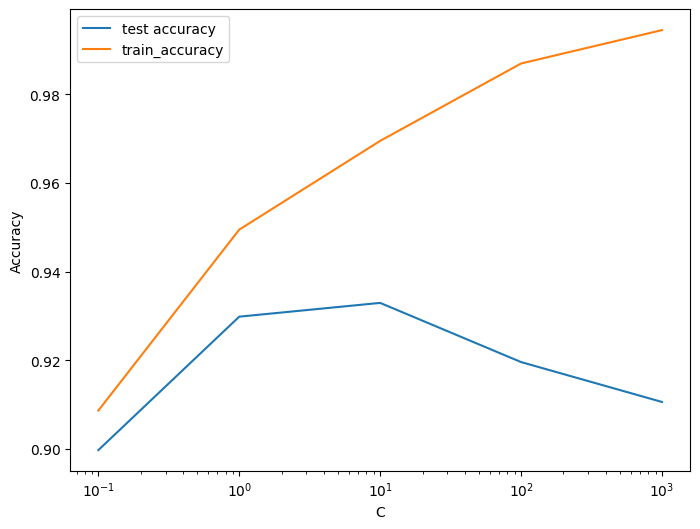

In [25]:
plt.figure(figsize=(8,6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train_accuracy'], loc='upper left')
plt.xscale('log')

In [26]:
best_score = model_cv.best_score_

best_C = model_cv.best_params_['C']

print("The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

The highest test accuracy is 0.9329192546583851 at C = 10


In [27]:
model = SVC(C=best_C)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [28]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))


accuracy 0.9362780593772628
precision 0.9216061185468452
recall 0.9111531190926276


### Optimizing other metrics

In [29]:
params = {"C": [0.1, 1, 10, 100, 1000]}

scores = ['accuracy', 'precision', 'recall']

for score in scores:
  print("Tuning hyperparameter for {}".format(score))

  clf = GridSearchCV(SVC(),
                     params,
                     cv=folds,
                     scoring=score,
                     return_train_score=True)

  clf.fit(X_train, y_train)

  print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
  print("\n")

Tuning hyperparameter for accuracy
 The highest accuracy score is 0.9329192546583851 at C = {'C': 10}


Tuning hyperparameter for precision
 The highest precision score is 0.9381180995975915 at C = {'C': 0.1}


Tuning hyperparameter for recall
 The highest recall score is 0.8982197583023674 at C = {'C': 10}




# The Performance for the linear SVM Model are the following:-
### - accuracy: 0.93
### - precision: 0.92
### - recall: 0.89

# Non-Linear SVM Model

In [30]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [31]:
email_df = pd.read_csv("/content/2. Spam.csv", sep=",")

In [32]:
email_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [33]:
X = email_df.drop("spam", axis=1)
y = email_df.spam.values.astype(int)

In [34]:
X_scaled = scale(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=5)

In [36]:
model = SVC(C=1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[815,  37],
       [ 62, 467]])

In [38]:
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("precision: ", metrics.precision_score(y_test, y_pred))
print("recall: ", metrics.recall_score(y_test, y_pred))

accuracy:  0.9283128167994207
precision:  0.9265873015873016
recall:  0.8827977315689981


## Hyperparameters:
  ### - Choice of kernel
  ### - C
  ### - gamma

In [43]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

hyper_params = [{'gamma':[1e-2, 1e-3, 1e-4],
                 'C':[1, 10, 100, 1000]}]

model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_params,
                        scoring='accuracy',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099447,0.001472,0.033963,0.001714,1,0.01,"{'C': 1, 'gamma': 0.01}",0.927019,0.923913,0.947205,...,0.930124,0.008618,4,0.941382,0.944488,0.939053,0.940994,0.938665,0.940916,0.002075
1,0.140162,0.006087,0.047931,0.000657,1,0.001,"{'C': 1, 'gamma': 0.001}",0.903727,0.891304,0.905280,...,0.900621,0.005103,11,0.905280,0.907609,0.903339,0.904891,0.902174,0.904658,0.001847
2,0.262378,0.046373,0.091538,0.022650,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.799689,0.779503,0.767081,...,0.787888,0.013523,12,0.791149,0.793090,0.798137,0.783385,0.781444,0.789441,0.006204
3,0.085589,0.006613,0.025514,0.001147,10,0.01,"{'C': 10, 'gamma': 0.01}",0.930124,0.928571,0.950311,...,0.933851,0.008482,2,0.960016,0.961957,0.958851,0.963509,0.960016,0.960870,0.001654
4,0.096198,0.003350,0.029798,0.000236,10,0.001,"{'C': 10, 'gamma': 0.001}",0.923913,0.920807,0.934783,...,0.924845,0.005159,7,0.935559,0.936335,0.932065,0.932842,0.932065,0.933773,0.001814
5,0.135846,0.003948,0.047522,0.000984,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.906832,0.891304,0.905280,...,0.901553,0.006180,10,0.902950,0.906056,0.901786,0.901786,0.900233,0.902562,0.001949
6,0.109952,0.003173,0.022289,0.000601,100,0.01,"{'C': 100, 'gamma': 0.01}",0.927019,0.914596,0.948758,...,0.927019,0.012577,6,0.980978,0.978649,0.977096,0.979037,0.979037,0.978960,0.001237
7,0.092076,0.003235,0.023134,0.001335,100,0.001,"{'C': 100, 'gamma': 0.001}",0.934783,0.922360,0.936335,...,0.931988,0.004949,3,0.947205,0.949922,0.947593,0.951475,0.945652,0.948370,0.002069
8,0.099072,0.002474,0.029951,0.000947,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.927019,0.909938,0.928571,...,0.921739,0.007388,8,0.931289,0.931677,0.925854,0.930124,0.927407,0.929270,0.002269
9,0.234057,0.068542,0.028333,0.006033,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.906832,0.916149,0.931677,...,0.916770,0.009033,9,0.993789,0.993012,0.991460,0.992624,0.993401,0.992857,0.000799


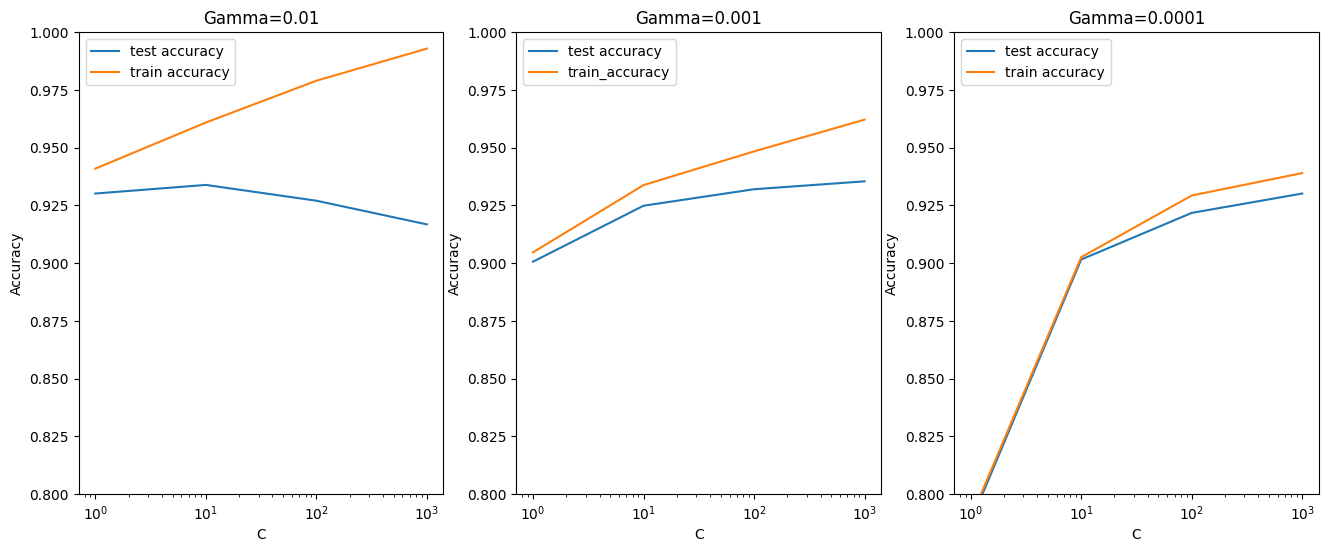

In [45]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01['param_C'], gamma_01["mean_test_score"])
plt.plot(gamma_01['param_C'], gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim(0.80, 1)
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001['param_C'], gamma_001["mean_test_score"])
plt.plot(gamma_001['param_C'], gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.001')
plt.ylim(0.80, 1)
plt.legend(['test accuracy', 'train_accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001['param_C'], gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'], gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.0001')
plt.ylim(0.80, 1)
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

## Insights:
### - High Values of gamma (0.01, 0.001) lead to overfitting.
### - Train and Test scores are comparable for lower values of gamma (0.0001).
### - It suggests that the model is a simple non-linear model.

In [46]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best score is 0.9354037267080745 corresponding to hyperparameters {'C': 1000, 'gamma': 0.001}


Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~92.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.


In [49]:
best_params = {'C':100, 'gamma':0.0001, 'kernel':'rbf'}

model = SVC(C=100, gamma=0.0001, kernel='rbf')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)
print("precision: ", metrics.precision_score(y_test, y_pred)*100)
print("recall: ", metrics.recall_score(y_test, y_pred)*100)

[[813  39]
 [ 68 461]] 

accuracy:  92.25199131064447
precision:  92.2
recall:  87.14555765595463


# Conclusion:
  - As it turns out the score of the non-linear model is comparable to the linear model, hence we don't need a non-linear model for this problem.